# Introduction

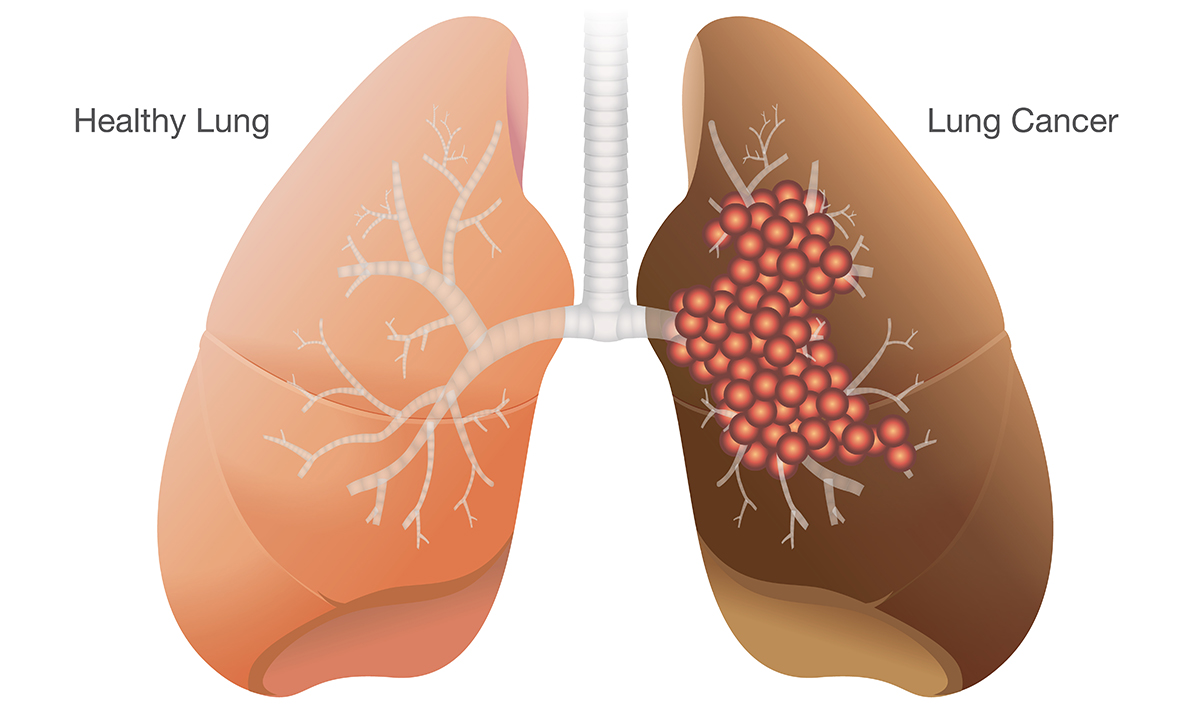

### Our goal
In this project we will try to predict if a person suffers from lung cancer or not according to his other medical information. We used a dataset from Kaggle website.


Link to the dataset in Kaggle: https://www.kaggle.com/mysarahmadbhat/lung-cancer

### About the Data attributes:


1. GENDER: <br>M=male, F=female (categorical)
2. AGE: <br> The age of the person (numerical)
3.SMOKING: <br> 1: the person does not smoke, 2: the person smokes (categorical)
4.YELLOW_FINGERS: <br> 1: the person does not have yellow fingers, 2: the person has yellow fingers (categorical)
5.ANXIETY: <br> 1: the person does not have anxiety, 2: the person has anxiety (categorical)
6.PEER_PRESSURE: <br> 1: the person does not feel peer pressure, 2: the person feels peer pressure (categorical)
7.CHRONIC DISEASE: <br> 1: the person does not suffer from chronic disease, 2: the person suffers from chronic disease (categorical)
8.FATIGUE: <br> 1: the person does not suffer from fatigue, 2: the person suffers from fatigue (categorical)
9.ALLERGY: <br> 1: the person does not have allergy, 2: the person has allergy (categorical)
10.WHEEZING: <br> 1: the person does not have wheezing, 2: the person has wheezing (categorical)
11.ALCOHOL CONSUMING: <br> 1: the person does not consume alcohol, 2: the person consumes alcohol (categorical)
12.COUGHING: <br> 1: the person does not have a cough, 2: the person has a cough (categorical)
13.SHORTNESS OF BREATH: <br> 1: the person does not have shortness of breath, 2: the person has shortness of breath (categorical)
14.SWALLOWING DIFFICULTY: <br> 1: the person does not have swallowing difficulty, 2: the person has swallowing difficulty (categorical)
15.CHEST PAIN: <br> 1: the person does not have chest pain, 2: the person has chest pain (categorical)
16.LUNG_CANCER: <br> NO: the person does not suffer from lung cancer, 2: the person suffers from lung cancer. (our target)     

### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier




from imblearn.over_sampling import SMOTE


%matplotlib inline

# Loading up the data 

In [2]:
data = pd.read_csv("C:/Users/Israel Gitler/Desktop/survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [5]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# we see that the Lung cancer  and Gender column types are object so we want to change them to numeric type:

In [6]:
data["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [7]:
data["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [8]:
# Mapping numeric values to non-numeric values

data['GENDER'] = data['GENDER'].map({'F': 0, 'M': 1})

data["LUNG_CANCER"] = data["LUNG_CANCER"].map({'NO': 0, 'YES': 1})

In [9]:
data['LUNG_CANCER']=data['LUNG_CANCER'].astype(int)

In [10]:
data.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int32
dtype: object

In [11]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


# Splitting the Data

In [12]:
# X data 
X = data.drop("LUNG_CANCER", axis = 1)

In [13]:
# y data 
y = data["LUNG_CANCER"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int32

In [14]:
x_train, x_test, y_train, y_test = train_test_split (X, y , test_size = 0.2, random_state = 12)

In [15]:
x_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
52,0,54,2,1,1,2,1,2,2,2,2,2,1,2,2
267,1,60,2,2,2,2,2,1,2,1,2,1,1,2,2
61,0,60,1,2,2,1,1,1,1,1,1,2,1,1,1
106,0,61,2,2,2,2,2,2,1,1,1,1,2,2,1
251,0,64,2,2,2,2,2,2,2,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,58,1,1,1,2,1,2,2,2,2,1,1,2,1
130,0,51,2,2,2,2,1,2,1,1,1,1,2,2,1
241,1,59,2,1,1,1,1,2,2,2,2,2,2,1,2
253,0,67,2,2,2,2,1,2,1,2,1,2,2,2,1


In [16]:
len(x_test), len(x_train)

(62, 247)

# lets look if the data is balanced

In [17]:
train_set=pd.concat((x_train,y_train),axis=1)
train_set


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
52,0,54,2,1,1,2,1,2,2,2,2,2,1,2,2,1
267,1,60,2,2,2,2,2,1,2,1,2,1,1,2,2,1
61,0,60,1,2,2,1,1,1,1,1,1,2,1,1,1,0
106,0,61,2,2,2,2,2,2,1,1,1,1,2,2,1,1
251,0,64,2,2,2,2,2,2,2,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,58,1,1,1,2,1,2,2,2,2,1,1,2,1,1
130,0,51,2,2,2,2,1,2,1,1,1,1,2,2,1,1
241,1,59,2,1,1,1,1,2,2,2,2,2,2,1,2,1
253,0,67,2,2,2,2,1,2,1,2,1,2,2,2,1,1


LUNG_CANCER
0     32
1    215
Name: LUNG_CANCER, dtype: int64


([<matplotlib.patches.Wedge at 0x22ed612a8b0>,
 [Text(1.5611259269632813, 0.6729679339783105, 'No'),
  Text(-1.607041330542395, -0.6927612589691552, 'Yes')],
 [Text(0.8723939003618336, 0.3760703160467028, '13.0%'),
  Text(-0.9183093317385113, -0.3958635765538029, '87.0%')])

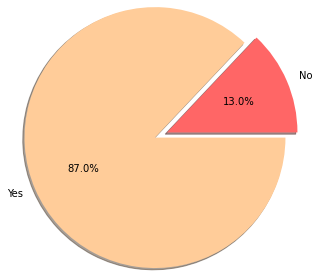

In [18]:
r = train_set.groupby('LUNG_CANCER')['LUNG_CANCER'].count()
print(r)
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True, colors=['#ff6666', '#ffcc99'])

# As we can see only 13% of the data has no lung cancer disease, so we need to increase the data. For this purpose we will use SMOTE technique later.

# lets look at the numeric attribute-age:

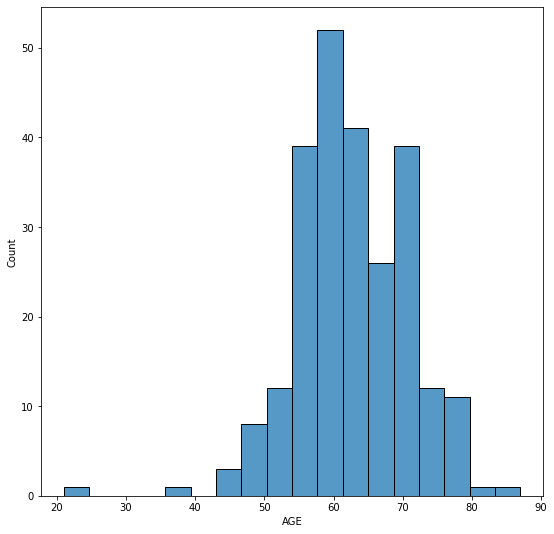

In [19]:
plt.figure(figsize=(9,9))
sns.histplot(train_set[['AGE']], x = "AGE")
plt.title("")
plt.show()

# we can see that the distribution of the ages is not equal. there are barely any young people.
# we are going to do something with that because we don't have another data. but its important to recognize it.



# lets look at the categorial attributes:

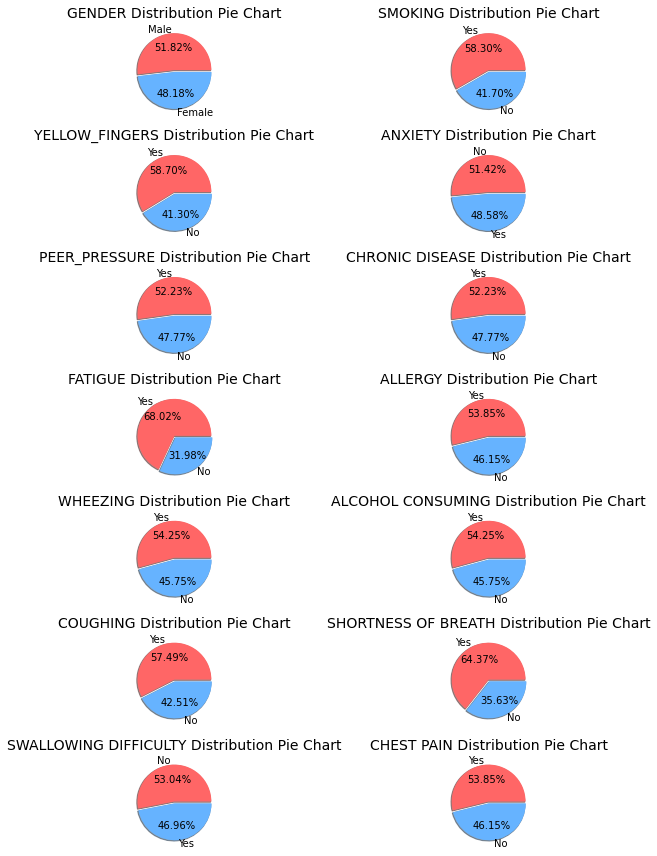

In [20]:
fig, ax = plt.subplots(7,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = ax

labels = ["Male", "Female"]
values = train_set['GENDER'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax1.set_title("GENDER Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['SMOKING'].value_counts().tolist()[:2]
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax2.set_title("SMOKING Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['YELLOW_FINGERS'].value_counts().tolist()[:2]
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax3.set_title("YELLOW_FINGERS Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["No", "Yes"]
values = train_set['ANXIETY'].value_counts().tolist()[:2]
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax4.set_title("ANXIETY Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['PEER_PRESSURE'].value_counts().tolist()[:2]
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax5.set_title("PEER_PRESSURE Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['CHRONIC DISEASE'].value_counts().tolist()[:2]
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax6.set_title("CHRONIC DISEASE Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['FATIGUE '].value_counts().tolist()[:2]
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax7.set_title("FATIGUE Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['ALLERGY '].value_counts().tolist()[:2]
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax8.set_title("ALLERGY Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['WHEEZING'].value_counts().tolist()[:2]
ax9.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax9.set_title("WHEEZING Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['ALCOHOL CONSUMING'].value_counts().tolist()[:2]
ax10.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax10.set_title("ALCOHOL CONSUMING Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['COUGHING'].value_counts().tolist()[:2]
ax11.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax11.set_title("COUGHING Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['SHORTNESS OF BREATH'].value_counts().tolist()[:2]
ax12.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax12.set_title("SHORTNESS OF BREATH Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["No", "Yes"]
values = train_set['SWALLOWING DIFFICULTY'].value_counts().tolist()[:2]
ax13.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax13.set_title("SWALLOWING DIFFICULTY Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = train_set['CHEST PAIN'].value_counts().tolist()[:2]
ax14.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05], colors=['#ff6666', '#66b3ff'])
ax14.set_title("CHEST PAIN Distribution Pie Chart", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

# Corolation

 # **we predict that there is a correlation between age and smoking to having lung cancer. lets see if it's true.**
   

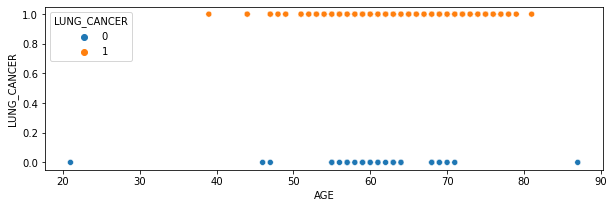

In [21]:
plt.figure(figsize=(10,3))
sns.scatterplot(data=train_set[['AGE', 'LUNG_CANCER']], x="AGE", y="LUNG_CANCER", hue="LUNG_CANCER")
plt.title("")
plt.show()

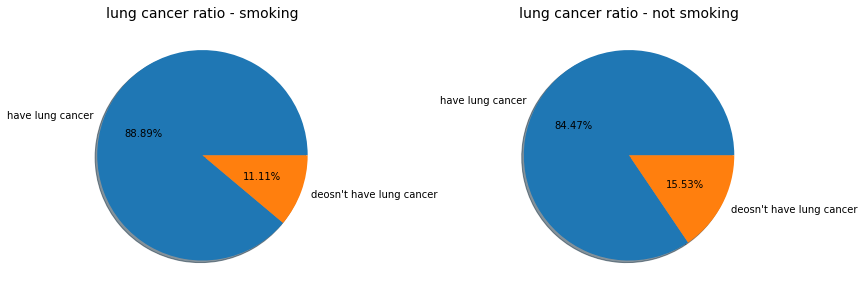

In [22]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['SMOKING']==2]['LUNG_CANCER'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("lung cancer ratio - smoking", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['SMOKING']==1]['LUNG_CANCER'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("lung cancer ratio - not smoking", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

# **from this plot we can see that there isn't a clear correlation between age and smoking to having lung cancer.**

<AxesSubplot:>

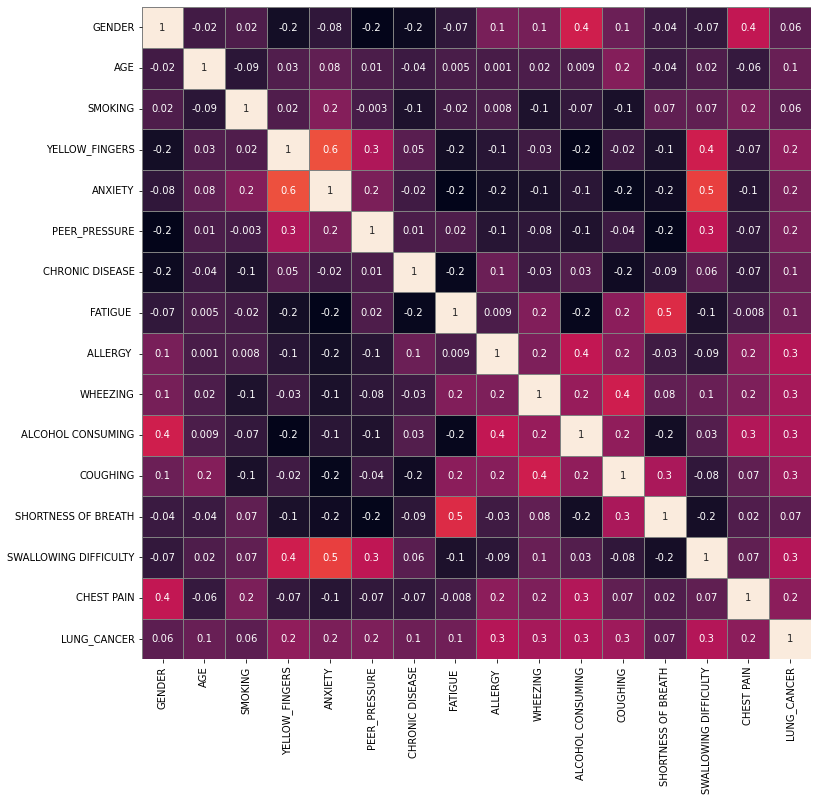

In [23]:
plt.figure(figsize = (12,12))
sns.heatmap(train_set.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, linecolor='grey')

In [24]:
corr_matrix = train_set.corr()
corr_matrix["LUNG_CANCER"].sort_values(ascending = False)

LUNG_CANCER              1.000000
ALLERGY                  0.319970
SWALLOWING DIFFICULTY    0.314722
ALCOHOL CONSUMING        0.299117
WHEEZING                 0.274917
COUGHING                 0.253549
YELLOW_FINGERS           0.215120
CHEST PAIN               0.199051
PEER_PRESSURE            0.162015
ANXIETY                  0.155669
FATIGUE                  0.123173
CHRONIC DISEASE          0.113743
AGE                      0.099744
SHORTNESS OF BREATH      0.065434
SMOKING                  0.064940
GENDER                   0.062323
Name: LUNG_CANCER, dtype: float64

# attributes which have main correlations with Lung cancer (>0.25):

# *Allergy

# *Alcohol consuming

# *swallowing difficulty

# *Wheezing

# *Coughing

<AxesSubplot:>

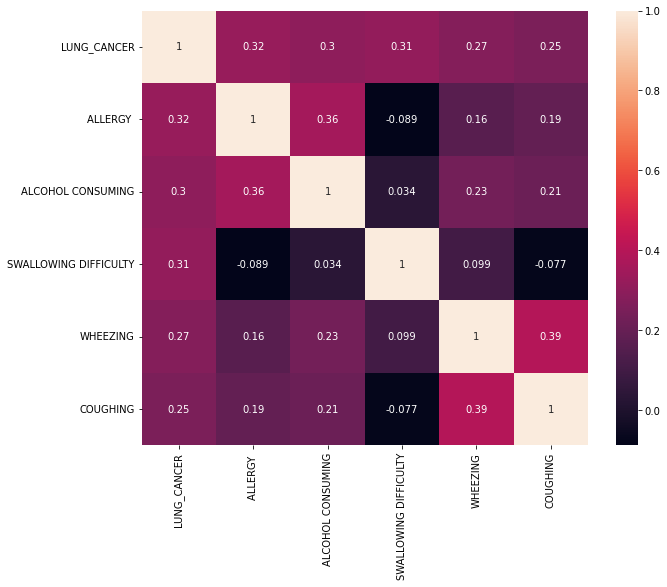

In [25]:
plt.figure(figsize = (10,8))
sns.heatmap(train_set[['LUNG_CANCER', 'ALLERGY ', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY','WHEEZING','COUGHING']].corr(),annot=True)

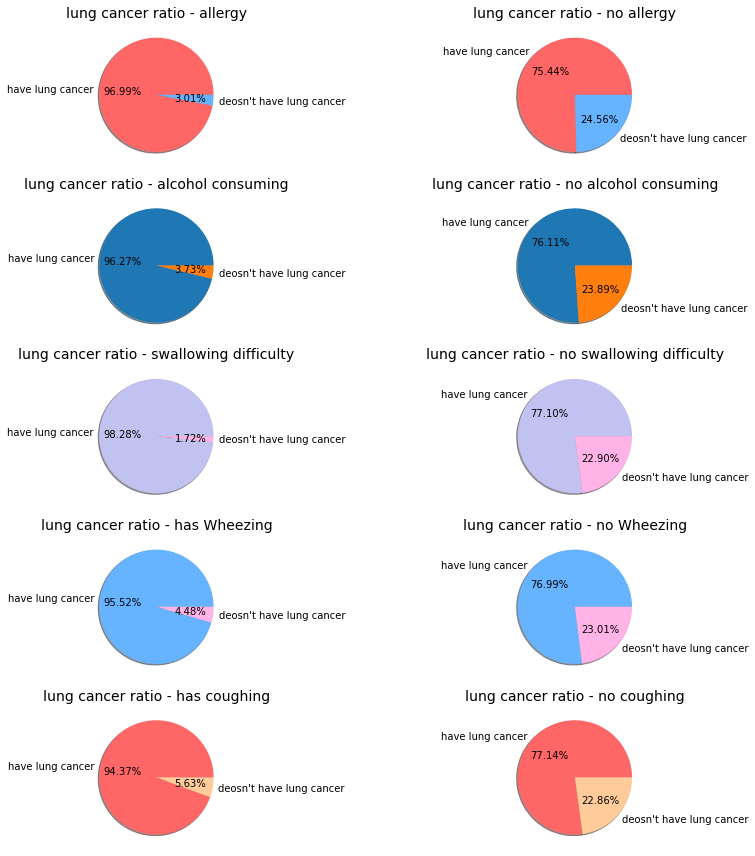

In [26]:
fig, ax = plt.subplots(5,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5,ax6), (ax7, ax8), (ax9,ax10)) = ax

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['ALLERGY ']==2]['LUNG_CANCER'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, colors=['#ff6666', '#66b3ff'])
ax1.set_title("lung cancer ratio - allergy", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['ALLERGY ']==1]['LUNG_CANCER'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, colors=['#ff6666', '#66b3ff'])
ax2.set_title("lung cancer ratio - no allergy", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['ALCOHOL CONSUMING']==2]['LUNG_CANCER'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("lung cancer ratio - alcohol consuming", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['ALCOHOL CONSUMING']==1]['LUNG_CANCER'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("lung cancer ratio - no alcohol consuming", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['SWALLOWING DIFFICULTY']==2]['LUNG_CANCER'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, colors=['#c2c2f0','#ffb3e6'])
ax5.set_title("lung cancer ratio - swallowing difficulty", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['SWALLOWING DIFFICULTY']==1]['LUNG_CANCER'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, colors=['#c2c2f0','#ffb3e6'])
ax6.set_title("lung cancer ratio - no swallowing difficulty", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['WHEEZING']==2]['LUNG_CANCER'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, colors=['#66b3ff','#ffb3e6'])
ax7.set_title("lung cancer ratio - has Wheezing", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['WHEEZING']==1]['LUNG_CANCER'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, colors=['#66b3ff','#ffb3e6'])
ax8.set_title("lung cancer ratio - no Wheezing", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['COUGHING']==2]['LUNG_CANCER'].value_counts().tolist()
ax9.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, colors=['#ff6666', '#ffcc99'])
ax9.set_title("lung cancer ratio - has coughing", fontdict={'fontsize': 14})

labels = ["have lung cancer", "deosn't have lung cancer"]
values = train_set[train_set['COUGHING']==1]['LUNG_CANCER'].value_counts().tolist()
ax10.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, colors=['#ff6666', '#ffcc99'])
ax10.set_title("lung cancer ratio - no coughing", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

In [27]:
x_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
52,0,54,2,1,1,2,1,2,2,2,2,2,1,2,2
267,1,60,2,2,2,2,2,1,2,1,2,1,1,2,2
61,0,60,1,2,2,1,1,1,1,1,1,2,1,1,1
106,0,61,2,2,2,2,2,2,1,1,1,1,2,2,1
251,0,64,2,2,2,2,2,2,2,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,1,58,1,1,1,2,1,2,2,2,2,1,1,2,1
130,0,51,2,2,2,2,1,2,1,1,1,1,2,2,1
241,1,59,2,1,1,1,1,2,2,2,2,2,2,1,2
253,0,67,2,2,2,2,1,2,1,2,1,2,2,2,1


In [28]:
#copy for backup
x_train_copy = x_train.copy()

x_train = pd.get_dummies(x_train, columns=['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'])
x_train.rename(columns={'AGE':'Age', 'GENDER_0':'Female', 'GENDER_1':'Male', 'SMOKING_1':'Not smoking', 'SMOKING_2':'Smoking',
       'YELLOW_FINGERS_1':'No yello fingers', 'YELLOW_FINGERS_2':'Has yello fingers', 'ANXIETY_1':'No anxiety', 'ANXIETY_2':'Has anxiety',
       'PEER_PRESSURE_1':'No peer preessure', 'PEER_PRESSURE_2':'peer preessure', 'CHRONIC DISEASE_1':'No chronic disease',
       'CHRONIC DISEASE_2':'No chronic disease', 'FATIGUE _1':'No fatigue', 'FATIGUE _2':'Has fatigue', 'ALLERGY _1':'No allergy',
       'ALLERGY _2':'Has allergy', 'WHEEZING_1':'No wheezing', 'WHEEZING_2':'Has wheezing', 'ALCOHOL CONSUMING_1':'doesnt consume alchohol',
       'ALCOHOL CONSUMING_2':'Consume alchohol', 'COUGHING_1':'No coughing', 'COUGHING_2':'Has a cough',
       'SHORTNESS OF BREATH_1':'No shortness of breath', 'SHORTNESS OF BREATH_2':'Has shortness of breath',
       'SWALLOWING DIFFICULTY_1':"No swallowing difficulty", 'SWALLOWING DIFFICULTY_2':'Has swallowing difficulty', 'CHEST PAIN_1':'No chest pain',
       'CHEST PAIN_2':'Has chest pain'}, inplace=True)
x_train

,Age,Female,Male,Not smoking,Smoking,No yello fingers,Has yello fingers,No anxiety,Has anxiety,No peer preessure,...,doesnt consume alchohol,Consume alchohol,No coughing,Has a cough,No shortness of breath,Has shortness of breath,No swallowing difficulty,Has swallowing difficulty,No chest pain,Has chest pain
52,54,1,0,0,1,1,0,1,0,0,...,0,1,0,1,1,0,0,1,0,1
267,60,0,1,0,1,0,1,0,1,0,...,0,1,1,0,1,0,0,1,0,1
61,60,1,0,1,0,0,1,0,1,1,...,1,0,0,1,1,0,1,0,1,0
106,61,1,0,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
251,64,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,58,0,1,1,0,1,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
130,51,1,0,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,1,0
241,59,0,1,0,1,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
253,67,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,1,1,0


# we need to do the same for the test set 

In [29]:
#copy for backup
x_test_copy = x_test.copy()

x_test = pd.get_dummies(x_test, columns=['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'])
x_test.rename(columns={'AGE':'Age', 'GENDER_0':'Female', 'GENDER_1':'Male', 'SMOKING_1':'Not smoking', 'SMOKING_2':'Smoking',
       'YELLOW_FINGERS_1':'No yello fingers', 'YELLOW_FINGERS_2':'Has yello fingers', 'ANXIETY_1':'No anxiety', 'ANXIETY_2':'Has anxiety',
       'PEER_PRESSURE_1':'No peer preessure', 'PEER_PRESSURE_2':'peer preessure', 'CHRONIC DISEASE_1':'No chronic disease',
       'CHRONIC DISEASE_2':'No chronic disease', 'FATIGUE _1':'No fatigue', 'FATIGUE _2':'Has fatigue', 'ALLERGY _1':'No allergy',
       'ALLERGY _2':'Has allergy', 'WHEEZING_1':'No wheezing', 'WHEEZING_2':'Has wheezing', 'ALCOHOL CONSUMING_1':'doesnt consume alchohol',
       'ALCOHOL CONSUMING_2':'Consume alchohol', 'COUGHING_1':'No coughing', 'COUGHING_2':'Has a cough',
       'SHORTNESS OF BREATH_1':'No shortness of breath', 'SHORTNESS OF BREATH_2':'Has shortness of breath',
       'SWALLOWING DIFFICULTY_1':"No swallowing difficulty", 'SWALLOWING DIFFICULTY_2':'Has swallowing difficulty', 'CHEST PAIN_1':'No chest pain',
       'CHEST PAIN_2':'Has chest pain'}, inplace=True)

# scaling the data using MinMaxScaler


In [30]:
scaler = MinMaxScaler()
x_train[['Age']] = scaler.fit_transform(x_train[['Age']])
x_test[['Age']] = scaler.transform(x_test[['Age']])

In [31]:
x_train['Age']

52     0.500000
267    0.590909
61     0.590909
106    0.606061
251    0.651515
         ...   
259    0.560606
130    0.454545
241    0.575758
253    0.696970
155    0.818182
Name: Age, Length: 247, dtype: float64

# Now our data is scaled and we are good to continue! :)

# SMOTE explaination

In [32]:
sm = SMOTE(random_state=32)
x_res, y_res = sm.fit_resample(x_train.to_numpy(), y_train)

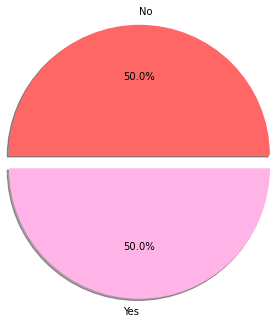

In [33]:
r = y_res.value_counts()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True, colors=['#ff6666', '#ffb3e6']);

In [34]:
x_res = pd.DataFrame(x_res, columns=x_train.columns)
x_res

,Age,Female,Male,Not smoking,Smoking,No yello fingers,Has yello fingers,No anxiety,Has anxiety,No peer preessure,...,doesnt consume alchohol,Consume alchohol,No coughing,Has a cough,No shortness of breath,Has shortness of breath,No swallowing difficulty,Has swallowing difficulty,No chest pain,Has chest pain
0,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.0,0.000000,1.000000
1,0.590909,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.000000
2,0.590909,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.0,1.000000,0.000000
3,0.606061,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.0,1.000000,0.000000
4,0.651515,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.654688,1.000000,0.000000,0.723823,0.276177,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.0,1.000000,0.000000
426,0.523687,0.000000,1.000000,1.000000,0.000000,0.040239,0.959761,1.000000,0.000000,0.959761,...,0.040239,0.959761,0.000000,1.000000,0.000000,1.000000,1.0,0.0,0.959761,0.040239
427,0.719453,0.103225,0.896775,0.000000,1.000000,0.896775,0.103225,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,0.103225,0.896775
428,0.653897,1.000000,0.000000,0.384278,0.615722,1.000000,0.000000,0.384278,0.615722,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.615722,0.384278,1.0,0.0,1.000000,0.000000


In [35]:
scaled_upsample_train_set = pd.concat([x_res,y_res],axis=1)
scaled_upsample_train_set

,Age,Female,Male,Not smoking,Smoking,No yello fingers,Has yello fingers,No anxiety,Has anxiety,No peer preessure,...,Consume alchohol,No coughing,Has a cough,No shortness of breath,Has shortness of breath,No swallowing difficulty,Has swallowing difficulty,No chest pain,Has chest pain,LUNG_CANCER
0,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.0,0.000000,1.000000,1
1,0.590909,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.000000,1.000000,1
2,0.590909,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.0,1.000000,0.000000,0
3,0.606061,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.0,1.000000,0.000000,1
4,0.651515,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.654688,1.000000,0.000000,0.723823,0.276177,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.0,1.000000,0.000000,0
426,0.523687,0.000000,1.000000,1.000000,0.000000,0.040239,0.959761,1.000000,0.000000,0.959761,...,0.959761,0.000000,1.000000,0.000000,1.000000,1.0,0.0,0.959761,0.040239,0
427,0.719453,0.103225,0.896775,0.000000,1.000000,0.896775,0.103225,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,0.103225,0.896775,0
428,0.653897,1.000000,0.000000,0.384278,0.615722,1.000000,0.000000,0.384278,0.615722,1.000000,...,0.000000,1.000000,0.000000,0.615722,0.384278,1.0,0.0,1.000000,0.000000,0


# lets look for prediction model!

#  dummy model
**lets look for the best dummy model**

In [36]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']

test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant =1)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(x_res, y_res)
    score = dclf.score(x_test, y_test)
    test_scores.append(score)

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


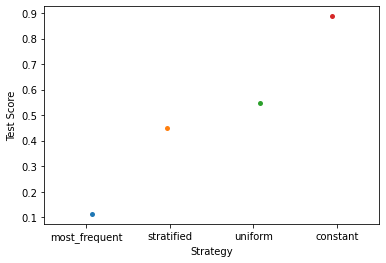

In [37]:
ax = sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()

The best strategy for dummy model is: "constant" with a score of: 0.8870967741935484


C:\Users\Israel Gitler\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


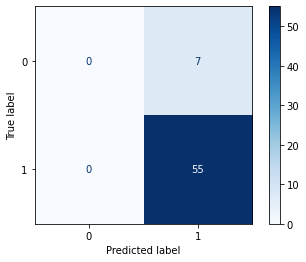

In [38]:
max_value = max(test_scores)
max_index = test_scores.index(max_value) 
print('The best strategy for dummy model is: "' + strategies[max_index] + '" with a score of: ' + str(max_value))

plot_confusion_matrix(dclf, x_test, y_test, cmap='Blues')  
plt.show()

we can see that the best dummy model is with "constant" strategy which always says as we decided that the person has lung cancer.
this is a stupid model because our test set is imbalanced (we can see that there are 55 people out of 62 in our test set that have lung cancer). in real life, this model will give bad results.

# להסביר שדיוק לא מתאים בהכרח ואנחנו מעדיפים את שיטת המדידה ריקול (להסביר לפני על שיטות מדידה)

**now, lets look for a better and realistic model with better results**

# K-NN model

In [39]:
f3_scorer = make_scorer(fbeta_score, beta=3)

In [40]:
knn=KNeighborsClassifier()

In [41]:
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']
metrics_options = ['euclidean', 'manhattan', 'minkowski']

In [42]:
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metrics_options)
grid=GridSearchCV(knn, param_grid, cv=10, scoring=f3_scorer)

In [43]:
grid.fit(x_res,y_res)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(fbeta_score, beta=3))

In [44]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.913014,0.064879,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
1,0.913014,0.064879,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
2,0.875815,0.054184,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
3,0.913014,0.064879,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
4,0.892579,0.057588,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
...,...,...,...
175,0.908644,0.072220,"{'metric': 'minkowski', 'n_neighbors': 28, 'we..."
176,0.791385,0.090818,"{'metric': 'minkowski', 'n_neighbors': 29, 'we..."
177,0.908644,0.072220,"{'metric': 'minkowski', 'n_neighbors': 29, 'we..."
178,0.782563,0.095242,"{'metric': 'minkowski', 'n_neighbors': 30, 'we..."


In [45]:
print(grid.best_score_)
print(grid.best_params_)

0.9384332441910852
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [46]:
best_knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')
best_knn.fit(x_res, y_res)
y_pred = best_knn.predict(x_test)

C:\Users\Israel Gitler\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


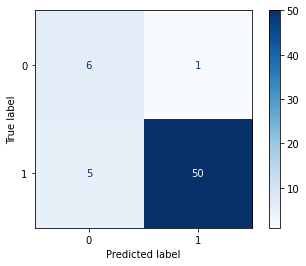

Accuracy: 0.9032258064516129
Re-call: 0.9090909090909091
Precision: 0.9803921568627451
f1: 0.9433962264150944
fbeta: 0.9157509157509159


In [47]:
plot_confusion_matrix(best_knn, x_test, y_test, cmap='Blues')  
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Re-call:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, beta=3))

knn_fbeta_score = metrics.fbeta_score(y_test, y_pred, beta=3)

# Random forest model

In [49]:
rfc=RandomForestClassifier(random_state=42) #default n_estimators is 100 trees.
param_grid = { 
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6],
    'criterion' :['gini', 'entropy']
}
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, scoring=f3_scorer)

In [50]:
rfc_grid.fit(x_res, y_res)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2']},
             scoring=make_scorer(fbeta_score, beta=3))

In [51]:
print(rfc_grid.best_score_)
print(rfc_grid.best_params_)

0.9466136099526683
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}


In [52]:
best_rfc=RandomForestClassifier(criterion='gini', max_depth=6, max_features='sqrt', random_state=42)
best_rfc.fit(x_res, y_res)
y_pred = best_rfc.predict(x_test)

C:\Users\Israel Gitler\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


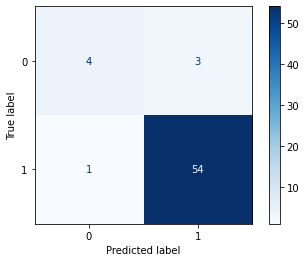

Accuracy: 0.9354838709677419
Re-call: 0.9818181818181818
Precision: 0.9473684210526315
f1: 0.9642857142857142
fbeta: 0.9782608695652174


In [53]:
plot_confusion_matrix(best_rfc, x_test, y_test, cmap='Blues')  
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Re-call:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, beta=3))

rfc_fbeta_score = metrics.fbeta_score(y_test, y_pred, beta=3)

*features selection*

In [54]:
best_feat = scaled_upsample_train_set[['Has allergy', 'Consume alchohol', 'Has swallowing difficulty', 'Has wheezing', 'Has a cough', 'LUNG_CANCER']]
x_best_feat = best_feat.drop('LUNG_CANCER', axis=1)
y_best_feat=best_feat['LUNG_CANCER']

y_best_feat

0      1
1      1
2      0
3      1
4      1
      ..
425    0
426    0
427    0
428    0
429    0
Name: LUNG_CANCER, Length: 430, dtype: int32

In [55]:
rfc_best_feat_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, scoring=f3_scorer)

rfc_best_feat_grid.fit(x_best_feat, y_best_feat)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2']},
             scoring=make_scorer(fbeta_score, beta=3))

In [56]:
print(rfc_best_feat_grid.best_score_)
print(rfc_best_feat_grid.best_params_)

0.9097272303087198
{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt'}


In [57]:
best_feat_rfc=RandomForestClassifier(criterion='gini', max_depth=2, max_features='sqrt', random_state=42)
best_feat_rfc.fit(x_res, y_res)
y_pred = best_feat_rfc.predict(x_test)

C:\Users\Israel Gitler\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


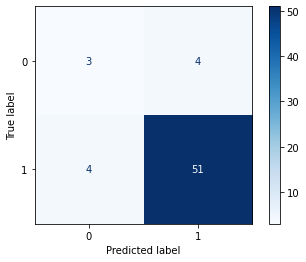

Accuracy: 0.8709677419354839
Re-call: 0.9272727272727272
Precision: 0.9272727272727272
f1: 0.9272727272727272
fbeta: 0.9272727272727271


In [58]:
plot_confusion_matrix(best_feat_rfc, x_test, y_test, cmap='Blues')  
plt.show()

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Re-call:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("f1:",metrics.f1_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, beta=3))

best_feat_rfc_fbeta_score = metrics.fbeta_score(y_test, y_pred, beta=3)

feature selection did not produce better f-beta score... so we will stick with the all data.

# in conclusion, we can see that the RandomForest model score (0.97) is better than the KNN model score (0.91)